In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

import read_datasets as rd
from importlib import reload
reload(rd)
import base64

import pickle

In [2]:
result_folder = '/raid/xiaoyuz1/amazon_turk/2022_02_04_pilot'
result_fname = os.path.join(result_folder, 'Batch_4663334_batch_results.csv')
png_path = os.path.join(result_folder, 'png_list.npy')
png_list = np.load(png_path)
df = pd.read_csv(result_fname)

18.00 sec = $ 0.07
1059.67 sec = $ 4.42
866.26 sec = $ 3.61
226.00 sec = $ 0.94
478.25 sec = $ 1.99
641.00 sec = $ 2.67
1416.50 sec = $ 5.90
3291.00 sec = $ 13.71


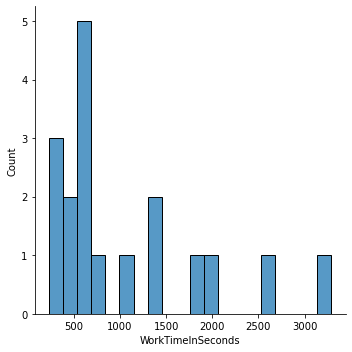

In [3]:
def money(s):
    return ((s/60)/60) * 15
for s in df["WorkTimeInSeconds"].describe():
    print('{:0.2f} sec = $ {:0.2f}'.format(s, money(s)))
 
sns.displot(df, x="WorkTimeInSeconds", bins=20)

In [4]:
all_input_data = []
for row_idx in range(len(df)):
    input_data = json.loads(base64.b64decode(df.iloc[row_idx]['Input.base64']).decode("utf-8"))
    all_input_data.append(input_data)

In [5]:
annotated_pngs = []
annotated_pngs_d = {}
for file in os.listdir("/raid/xiaoyuz1/sketch_datasets/spg_body/angel"):
    if file.endswith(".pickle"):
        
        with open(os.path.join("/raid/xiaoyuz1/sketch_datasets/spg_body/angel", file), 'rb') as f:
            png_idx = pickle.load(f)
            
            annotated_pngs += list(png_idx)
            annotated_pngs_d[file.split(".")[0]] = png_idx

from collections import defaultdict

def def_value():
    return []
      
png_idx_to_k = defaultdict(def_value)

for k,v in annotated_pngs_d.items():
    for vi in v:
        png_idx_to_k[vi].append(k)

k_to_part_idx = {}
for k in annotated_pngs_d.keys():
    if "body" in k:
        k_to_part_idx[k] = 5
    if "wing" in k:
        k_to_part_idx[k] = 7

k_to_png_idx_to_df = defaultdict(def_value)
for hit_idx, each_hit_png_list in enumerate(png_list):
    df_indices = [3 * hit_idx+0, 3 * hit_idx+1, 3 * hit_idx+2]
    for anno_idx, sketch_indices in enumerate(each_hit_png_list):
        for df_idx in df_indices:
            anno_data = all_input_data[df_idx][anno_idx]
            part_idx, part_name, _,_ = anno_data['PartsToAnnotate'][0]

            for sketch_idx, sketch_png_idx in enumerate(sketch_indices):

                    blank_1 = df.iloc[df_idx][
                        "Answer.inputAnnotationName_{}-{}__{}".format(anno_idx+1, part_idx, sketch_idx+1)]

                    info = [
                        sketch_png_idx,
                        png_idx_to_k[sketch_png_idx],
                        df_idx,
                        anno_idx,
                        part_idx,
                        blank_1,
                    ]
                    for k in png_idx_to_k[sketch_png_idx]:
                        
                        if k_to_part_idx[k] == part_idx:
                            k_to_png_idx_to_df[k].append(info)

In [6]:
def show_these_sketches(category_name, png_indices, titles, part_indices, show_title=False):
    obj = json.load(open(
    '/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping/{}.ndjson'.format(category_name), 
    'r'))
    
    num_pngs_per_row = 3
    num_rows = len(png_indices) // num_pngs_per_row
    if num_rows * num_pngs_per_row < len(png_indices):
        num_rows += 1

    fig = plt.figure(figsize=(num_pngs_per_row * 6, num_rows * 3)) 
    fig.patch.set_alpha(1)  # solution

    for index, idx in enumerate(png_indices):
        plt.subplot(num_rows, num_pngs_per_row, index+1)
        
        drawing_raw = obj['train_data'][idx]
        image_data = rd.transform_spg_2_svg_png(
            drawing_raw, 
            draw_color = True, 
            stroke_width = 3,
            color_selected = [part_indices[index]],
        )
        
        plt.imshow(image_data)
        plt.title(titles[index])
        plt.axis('off')

    plt.show()
    plt.close()

oval_body


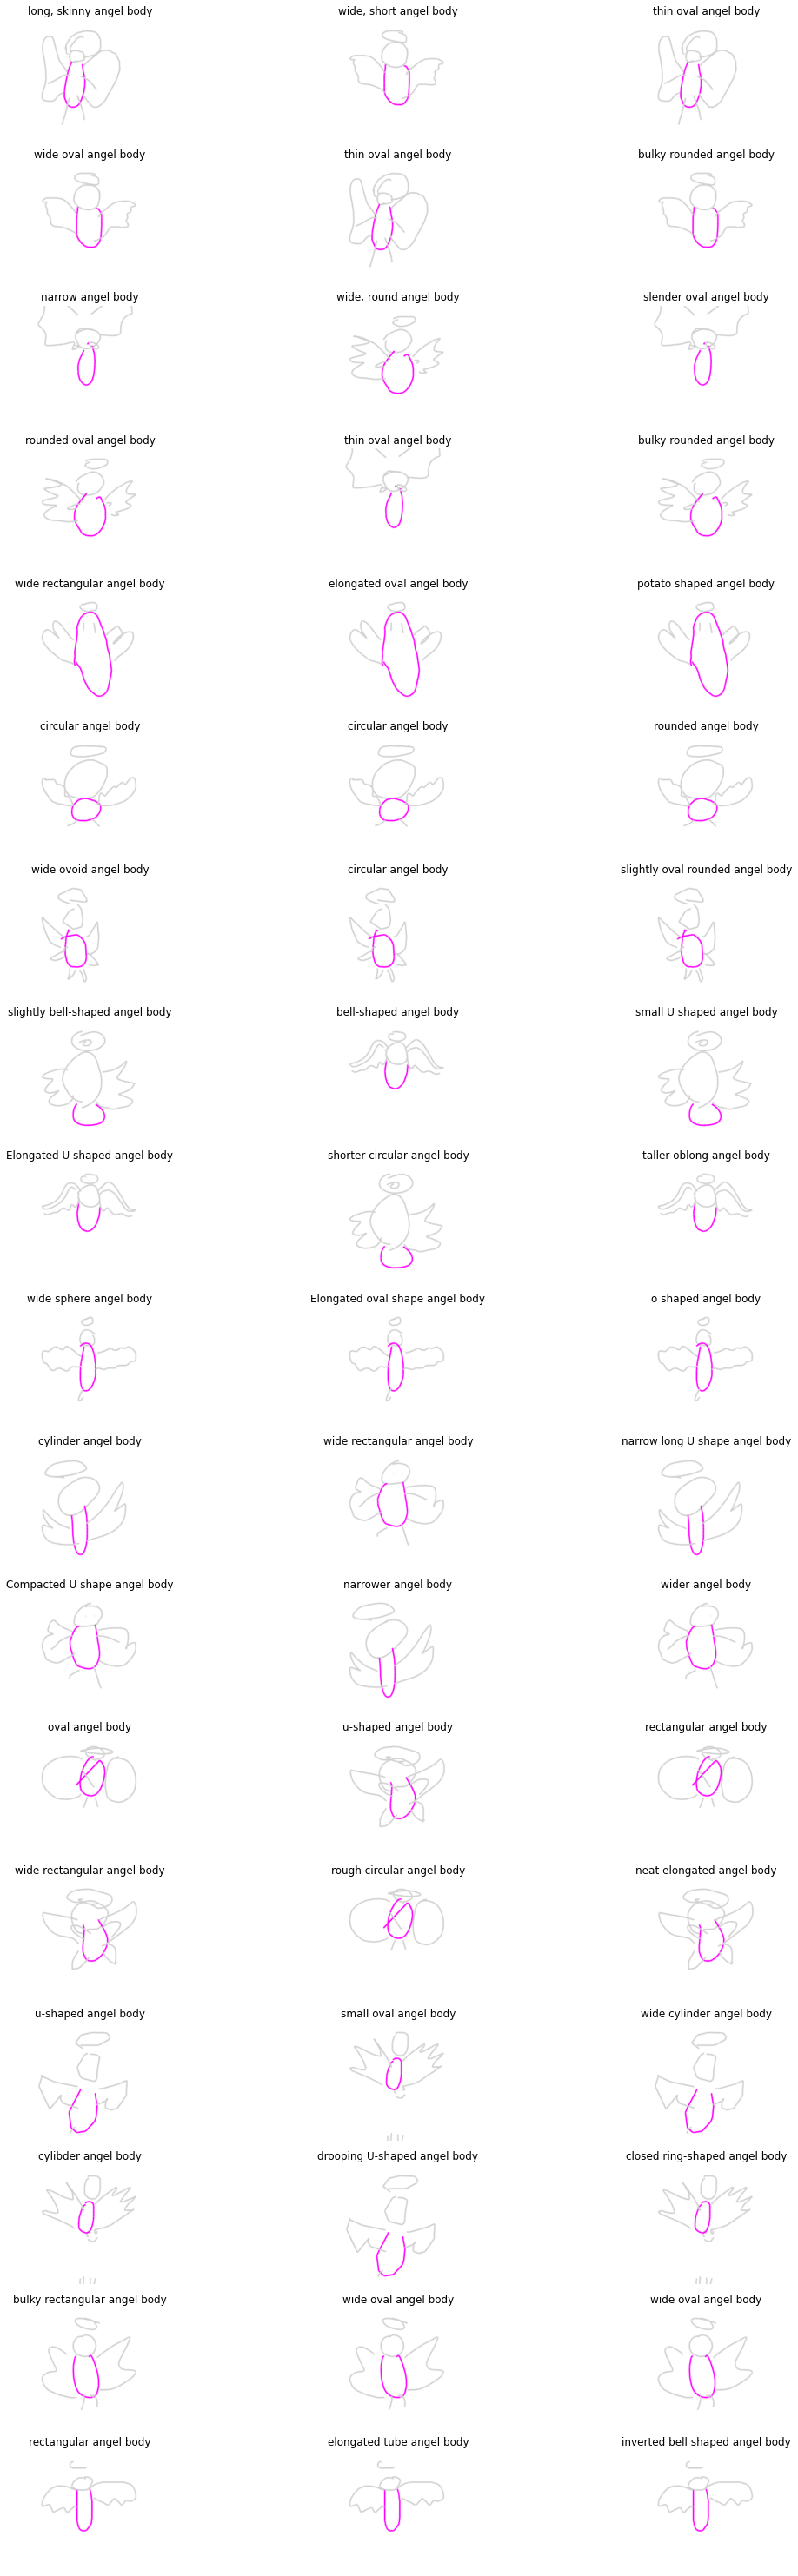

raindrop_body


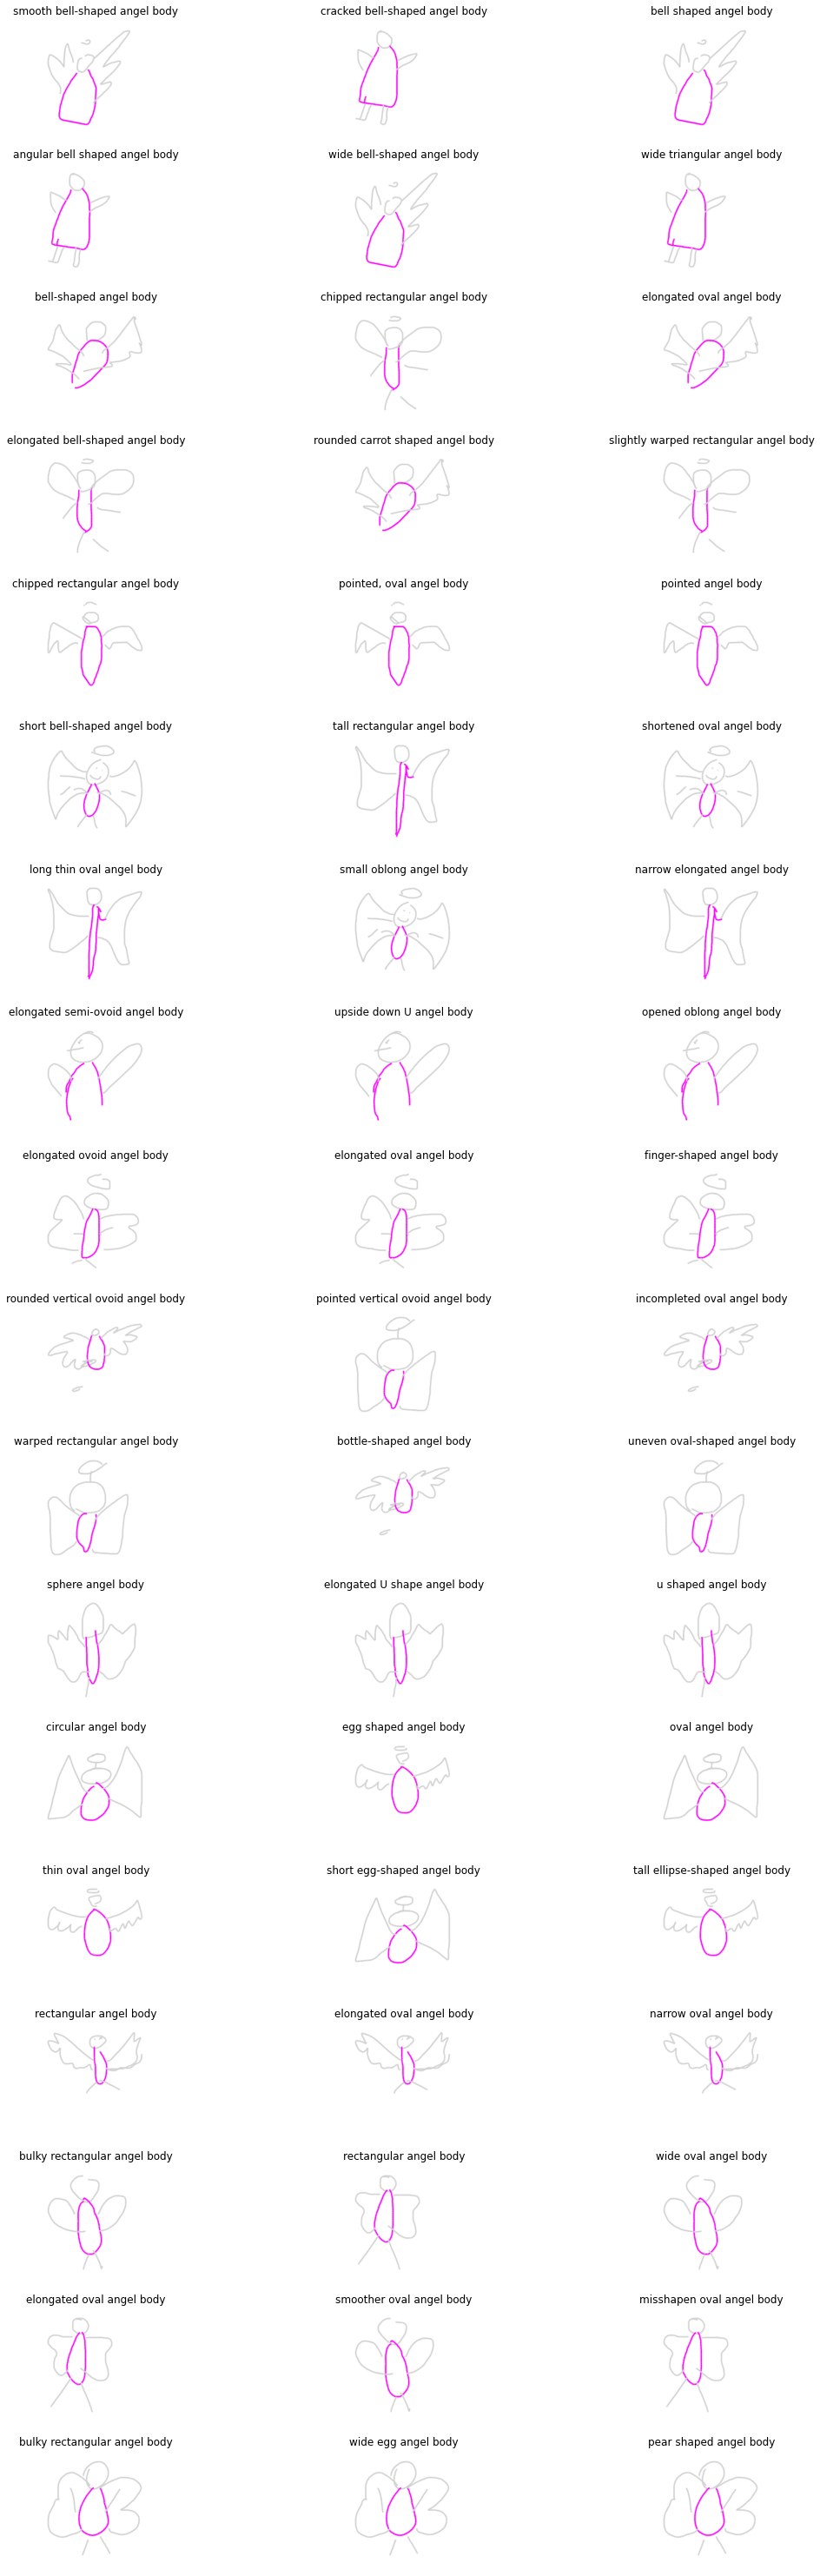

wing_type_4


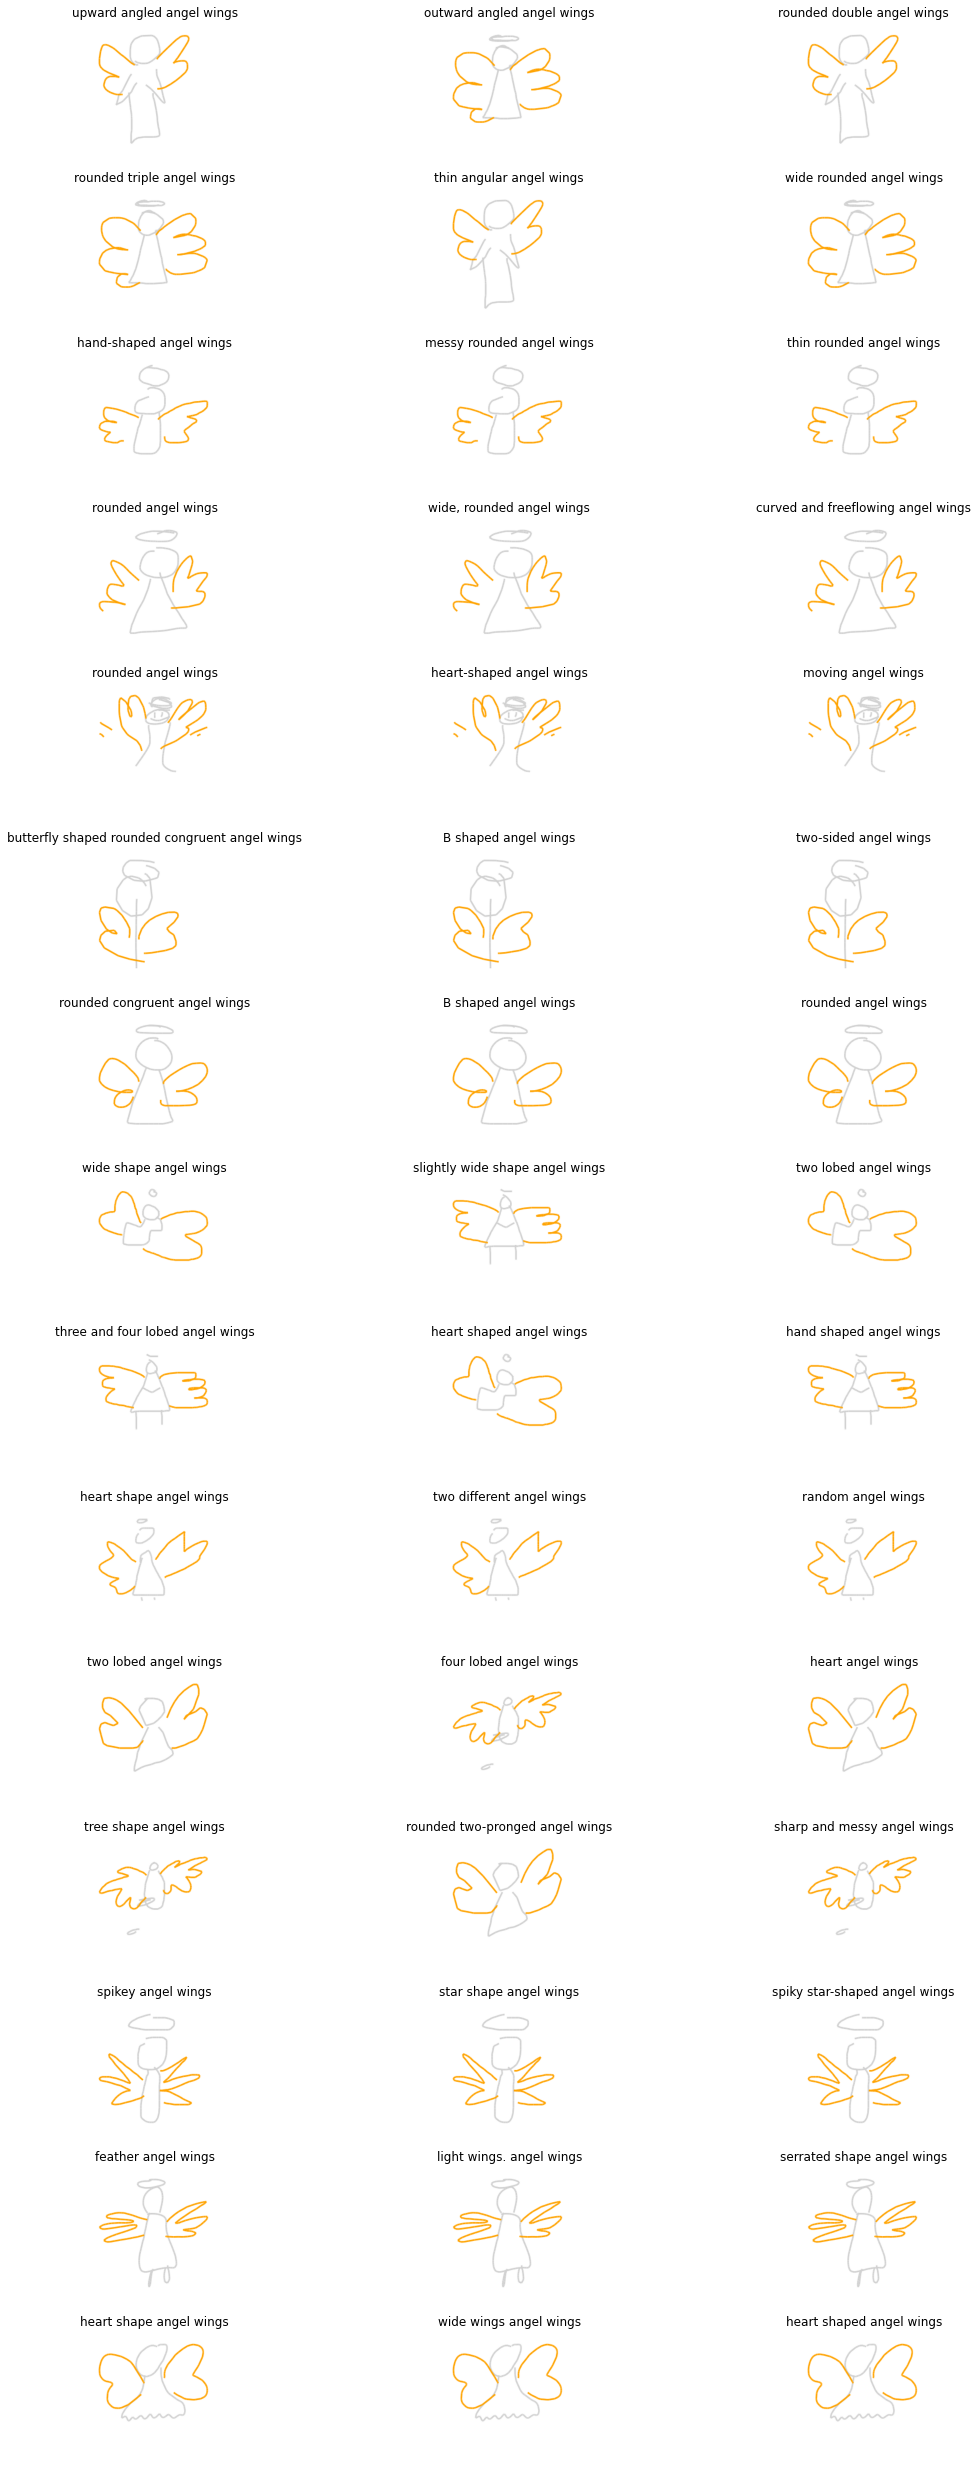

wing_type_1


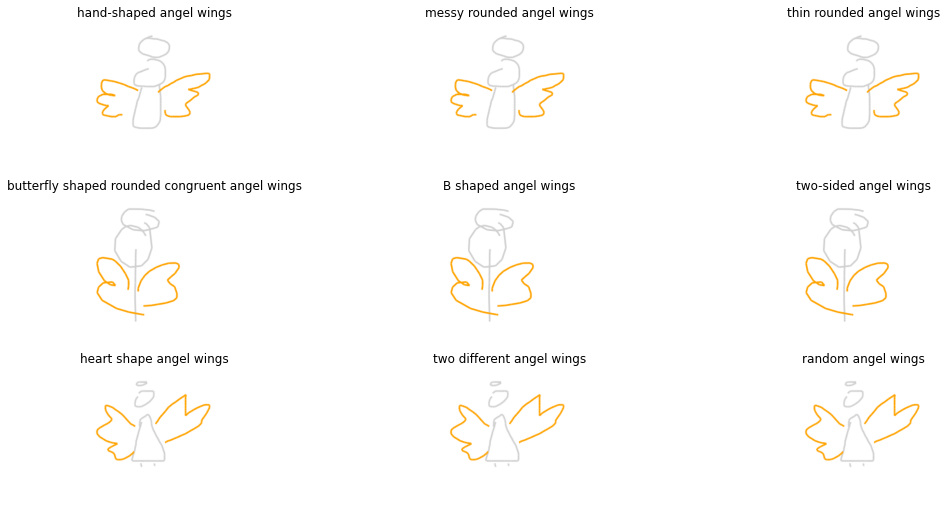

wing_type_5


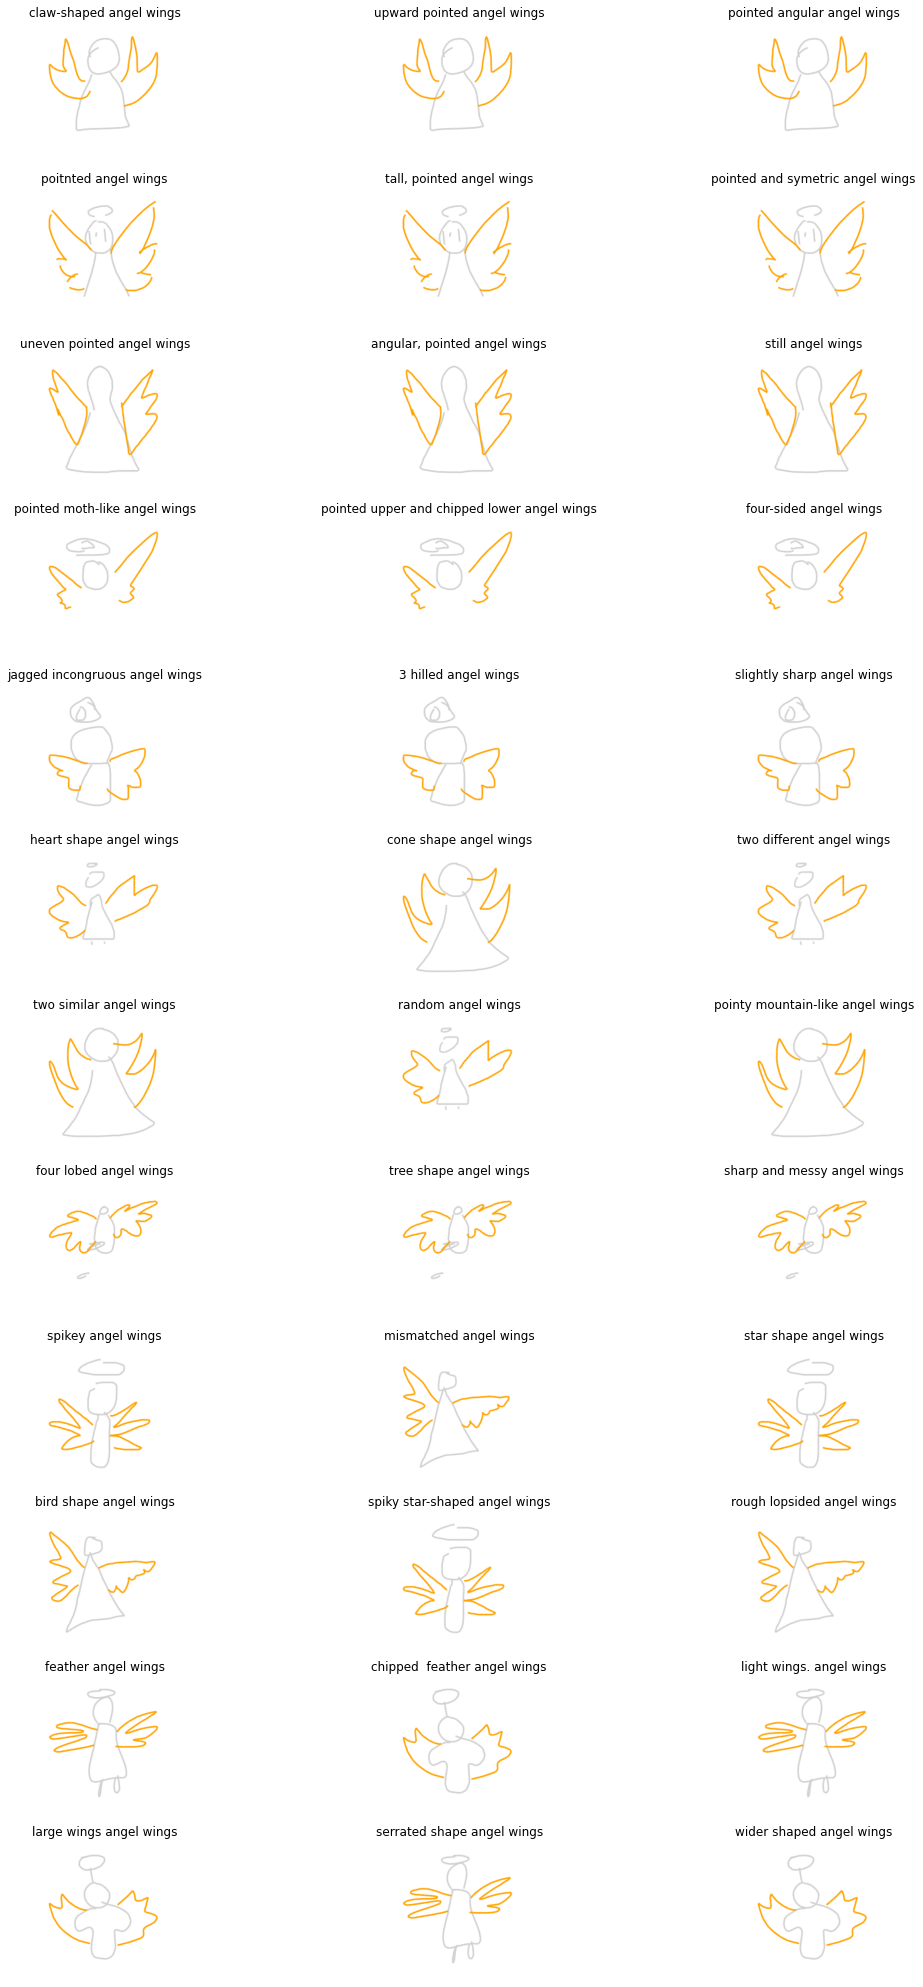

In [7]:
texts = []
for k,v in k_to_png_idx_to_df.items():
    print(k)
    
    png_indices = [info[0] for info in v]
    png_titles = []
    for info in v:
        if info[4] == 5:
            png_titles += ["{} angel body".format(info[5])]
        else:
            png_titles += ["{} angel wings".format(info[5])]
    texts += png_titles
    part_indices = [info[4] for info in v]
    
    
    show_these_sketches("angel", png_indices, png_titles, part_indices, show_title=True)
    

In [10]:
for t in texts:
    print(t)

long, skinny angel body
wide, short angel body
thin oval angel body
wide oval angel body
thin oval angel body
bulky rounded angel body
narrow angel body
wide, round angel body
slender oval angel body
rounded oval angel body
thin oval angel body
bulky rounded angel body
wide rectangular angel body
elongated oval angel body
potato shaped angel body
circular angel body
circular angel body
rounded angel body
wide ovoid angel body
circular angel body
slightly oval rounded angel body
slightly bell-shaped angel body
bell-shaped angel body
small U shaped angel body
Elongated U shaped angel body
shorter circular angel body
taller oblong angel body
wide sphere angel body
Elongated oval shape angel body
o shaped angel body
cylinder angel body
wide rectangular angel body
narrow long U shape angel body
Compacted U shape angel body
narrower angel body
wider angel body
oval angel body
u-shaped angel body
rectangular angel body
wide rectangular angel body
rough circular angel body
neat elongated angel

In [ ]:
category_name = "angel"
obj = json.load(open(
'/raid/xiaoyuz1/sketch_datasets/SketchX-PRIS-Dataset/Perceptual Grouping/{}.ndjson'.format(category_name), 
    'r'))
# fig = plt.figure(figsize=(10,200)) 


for hit_idx, each_hit_png_list in enumerate(png_list):
    df_indices = [3 * hit_idx+0, 3 * hit_idx+1, 3 * hit_idx+2]
    for anno_idx, anno_png_list in enumerate(each_hit_png_list):
        anno_s1, anno_s2 = anno_png_list
        
        for row_idx in df_indices:
            data = df.iloc[row_idx]
            print(
                row_idx, 
                "Hit Id={}, Worker Id={}".format(data['HITId'], data['WorkerId']), 
                ", spend time: ", data['WorkTimeInSeconds'])
            input_data = all_input_data[row_idx]
            anno_data = input_data[anno_idx]
            part_idx, part_name, _,_ = anno_data['PartsToAnnotate'][0]
            
            fig = plt.figure(figsize=(10,3))
            fig.patch.set_alpha(1)  # solution
            for index,idx in enumerate([anno_s1, anno_s2]):
                plt.subplot(1,2,index+1)

                drawing_raw = obj['train_data'][idx]
                image_data = rd.transform_spg_2_svg_png(
                    drawing_raw, 
                    draw_color=True, 
                    stroke_width = 3,
                    color_selected = [part_idx],
                )
                plt.imshow(image_data)
                plt.title("({}.png) {}".format(
                    idx,
                    data["Answer.inputAnnotationName_{}-{}__{}".format(anno_idx+1, part_idx, index+1)],
                ))

            plt.show()
        
        print("\n\n")
    
    print("----------------------------------------------------------\n\n")

In [ ]:
target_word = "lobe"

png_contain_target_word = []
for row_idx in range(len(df)):
    data = df.iloc[row_idx]
    
    for k,v in data.items():
        if not k.startswith("Answer.inputAnnotationName"):
            continue
        
        try:
            if np.isnan(v):
                continue
        except:
            
            if target_word not in v:
                continue

            hit_idx = row_idx // 3
            anno_idx = int(k.split("_")[1].split("-")[0])-1
            part_idx = int(k.split("-")[1].split("__")[0])
            sketch_idx = int(k.split("__")[1])-1
            #print(k,v, hit_idx, anno_idx, part_idx, sketch_idx)
            png_contain_target_word.append([row_idx, hit_idx, anno_idx, part_idx, sketch_idx, v])
        
# png_contain_target_word = np.asarray(png_contain_target_word)        

# num_pngs_per_row = 3
# num_rows = len(png_contain_target_word) // num_pngs_per_row
# if num_rows * num_pngs_per_row < len(png_contain_target_word):
#     num_rows += 1
num_rows = len(png_contain_target_word)
num_pngs_per_row = 2
fig = plt.figure(figsize=(num_pngs_per_row*8, num_rows*5)) 

# print(png_contain_target_word)
fig.patch.set_alpha(1)  # solution
plt_index = 0
for index, (row_idx, hit_idx, anno_idx, part_idx, sketch_idx_orig, v) in enumerate(png_contain_target_word):
    data = df.iloc[row_idx]
    
    
    for sketch_idx, idx in enumerate(png_list[hit_idx][anno_idx]):
        text = data["Answer.inputAnnotationName_{}-{}__{}".format(anno_idx+1, part_idx, sketch_idx+1)]
        
        idx = png_list[hit_idx][anno_idx][sketch_idx]

        plt.subplot(num_rows,2, plt_index+1)

        drawing_raw = obj['train_data'][idx]
        image_data = rd.transform_spg_2_svg_png(
            drawing_raw, 
            draw_color=True, 
            stroke_width = 3,
            color_selected = [part_idx],
        )

        plt.imshow(image_data)
        if sketch_idx == sketch_idx_orig:
            plt.title("{} No.{} ({}): {}".format(row_idx, index+1, idx, v))
        else:
            plt.title("({}): {}".format(idx, text))
        plt_index += 1